# Imports

In [23]:
import pandas as pd
import numpy as np
import cross_validation as cv
import random

from tabulate import tabulate
from cross_validation import runCrossValidation
from sklearn.ensemble import RandomForestClassifier

# Load data

In [13]:
#train
x_train_df5 = pd.read_pickle(r'../data/interim/x_train_df5_round1.pkl')
y_train_df5 = pd.read_pickle(r'../data/interim/y_train_df5_round1.pkl')

#validation
x_val_ml = pd.read_pickle(r'../data/interim/x_val_ml_round1.pkl')
y_val = pd.read_pickle(r'../data/interim/y_val_round1.pkl')

#test
x_test = pd.read_pickle(r'../data/interim/x_test_round1.pkl')
y_test = pd.read_pickle(r'../data/interim/y_test_round1.pkl')

# 13.1 Random forest classifier

In [29]:
## session with high processing time: 24m 55.30s
## results compiled in the following table

param = {
    'n_estimators':  [100, 200, 300, 400, 500],
    'min_samples_split':  [2,3,4], 
    'max_depth': [3,5,9],
    'min_samples_leaf': [1,2,3],
    'class_weight': [None, 'balanced','balanced_subsample']
}


max_eval = 5


for i in range(max_eval):
    # random choice of dictionary values
    hp = {k: random.sample(v,1)[0] for k, v in param.items()}
    print(hp)

    # model definition
    rf_model = RandomForestClassifier(n_estimators = hp['n_estimators'], 
                                      min_samples_split = hp['min_samples_split'],
                                      max_depth = hp['max_depth'],
                                      min_samples_leaf = hp['min_samples_leaf'],
                                      class_weight = hp['class_weight'],
                                      n_jobs = -1)

    
    display(cv.runCrossValidation(rf_model, x_train_df5, x_val_ml,y_train_df5,y_val, n_splits = 10, n_repeats = 2, top_k = 12200))
    



{'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 3, 'class_weight': 'balanced_subsample'}


,mean,std
precision_at_k,0.280711,0.001704
recall_at_k,0.916546,0.005571


{'n_estimators': 400, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 3, 'class_weight': None}


,mean,std
precision_at_k,0.280395,0.001754
recall_at_k,0.915516,0.005731


{'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 2, 'class_weight': None}


,mean,std
precision_at_k,0.280428,0.001634
recall_at_k,0.915623,0.005338


{'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 3, 'min_samples_leaf': 3, 'class_weight': 'balanced'}


,mean,std
precision_at_k,0.279043,0.001688
recall_at_k,0.911101,0.005529


{'n_estimators': 500, 'min_samples_split': 4, 'max_depth': 3, 'min_samples_leaf': 1, 'class_weight': 'balanced'}


,mean,std
precision_at_k,0.279129,0.001505
recall_at_k,0.911382,0.004940


In [142]:
final_results = {'model':['#1', '#2', '#3', '#4', '#5'],
                 'precision_at_k': ['0.280711 +/- 0.001704',
                                    '0.280395 +/- 0.001754',
                                    '0.280428 +/- 0.001634',
                                    '0.279043 +/- 0.001688',
                                    '0.279129 +/- 0.001505'],
                 'recall_at_k': ['0.916546 +/- 0.005571',
                                 '0.915516 +/- 0.0057311',
                                 '0.915623 +/- 0.005338',
                                 '0.911101 +/- 0.005529',
                                 '0.911382 +/- 0.004940'],
                 'parameters': ["'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 3, 'class_weight': 'balanced_subsample'",
                                "'n_estimators': 400, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 3, 'class_weight': None",
                                "'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 2, 'class_weight': None",
                                "'n_estimators': 100, 'min_samples_split': 3, 'max_depth': 3, 'min_samples_leaf': 3, 'class_weight': 'balanced",
                                "'n_estimators': 500, 'min_samples_split': 4, 'max_depth': 3, 'min_samples_leaf': 1, 'class_weight': 'balanced"]
                }

print(tabulate(final_results, headers=['model','precision@k','recall@k', 'hyperparameters'], tablefmt="fancy_grid"))

╒═════════╤═══════════════════════╤════════════════════════╤══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ model   │ precision@k           │ recall@k               │ hyperparameters                                                                                                          │
╞═════════╪═══════════════════════╪════════════════════════╪══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ #1      │ 0.280711 +/- 0.001704 │ 0.916546 +/- 0.005571  │ 'n_estimators': 300, 'min_samples_split': 3, 'max_depth': 5, 'min_samples_leaf': 3, 'class_weight': 'balanced_subsample' │
├─────────┼───────────────────────┼────────────────────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│ #2      │ 0.280395 +/- 0.001754 │ 0.915516 +/- 0.0057311 │ 'n_estimators': 400

The results were similar between the different hyperparameter configurations. For the final evaluation, we will choose #1.

# 13.1.1 Model training and ranked list export

In [33]:
# model definition
rf_model = RandomForestClassifier(n_estimators = 300, 
                                  min_samples_split = 3,
                                  max_depth = 5,
                                  min_samples_leaf = 3,
                                  class_weight = 'balanced_subsample',
                                  n_jobs = -1)

# model training
rf_model.fit(x_train_df5, y_train_df5)

# model prediction (proba)
yhat_proba = rf_model.predict_proba(x_val_ml)


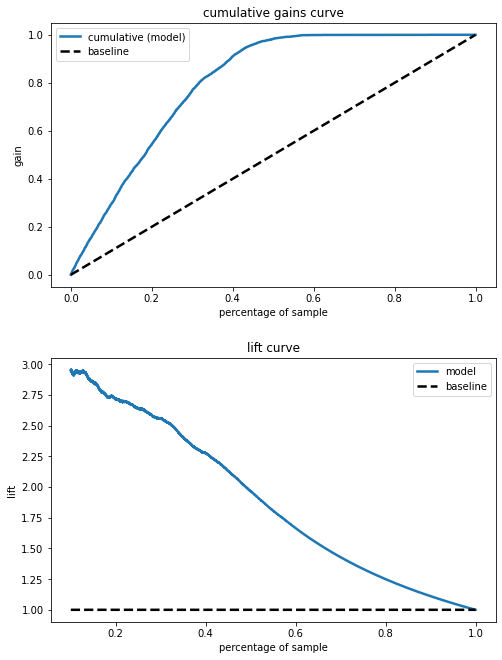

In [56]:
table = cv.gain_lift_curve(yhat_proba,y_val)
metrics, new_table = cv.precision_recall_at_k(table, 12200)
new_table.to_pickle(r"../data/processed/rf_table.pkl")